In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3
%matplotlib inline

import os

for directory,_,filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(directory,filename))

./df_artists.csv
./df_songs.csv
./data.db
./Spotify_VIsualization_MM.ipynb
./df_characteristics.csv
./Spotify-data-ans.ipynb
./Spotify-2000.csv
./df_genres.csv
./.ipynb_checkpoints/Spotify_VIsualization_MM-checkpoint.ipynb
./.git/config
./.git/HEAD
./.git/description
./.git/index
./.git/packed-refs
./.git/COMMIT_EDITMSG
./.git/objects/pack/pack-6abed87de8fd00618e7dd940ff123dcff63a53c2.pack
./.git/objects/pack/pack-6abed87de8fd00618e7dd940ff123dcff63a53c2.idx
./.git/objects/5b/fe86f1f60474bf87c61a8a1a535f1bba440213
./.git/objects/7f/52045c70ccd739148cb645f6a28e58a4438abc
./.git/objects/7a/b1a5296667fdb1a0ff38d6bd3919528f3fcf6e
./.git/info/exclude
./.git/logs/HEAD
./.git/logs/refs/heads/master
./.git/logs/refs/remotes/origin/HEAD
./.git/logs/refs/remotes/origin/master
./.git/hooks/commit-msg.sample
./.git/hooks/pre-rebase.sample
./.git/hooks/pre-commit.sample
./.git/hooks/applypatch-msg.sample
./.git/hooks/fsmonitor-watchman.sample
./.git/hooks/pre-receive.sample
./.git/hooks/prepare-com

In [461]:
cnx = sqlite3.connect('./data.db')

# df_songs = pd.read_sql_query("SELECT * FROM songs", cnx)
df_songs = pd.read_csv('df_songs2.csv')


In [462]:
df_artists = pd.read_sql_query("SELECT * FROM artist", cnx)

In [463]:
df_genre = pd.read_csv('df_genres2.csv')

In [464]:
df_char = pd.read_sql_query("SELECT * FROM characteristics", cnx)
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   song_id       1994 non-null   int64
 1   bpm           1994 non-null   int64
 2   energy        1994 non-null   int64
 3   danceability  1994 non-null   int64
 4   db            1994 non-null   int64
 5   liveness      1994 non-null   int64
 6   valence       1994 non-null   int64
 7   length        1994 non-null   int64
 8   acousticness  1994 non-null   int64
 9   speechiness   1994 non-null   int64
 10  popularity    1994 non-null   int64
dtypes: int64(11)
memory usage: 171.5 KB


In [465]:
df_songs.head(2)

,song_id,title,year,artist_id,genre_id
0,0,Sunrise,2004,0,0
1,33,Don't Know Why,2002,0,0


In [466]:
df = df_songs.merge(df_genre).merge(df_artists).merge(df_char)

In [467]:
df.head()

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65


# Explore top 10 genres

In [468]:
top10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:10].reset_index()['genre_name']

top10_genres

0                rock
1                 pop
2               dutch
3     adult standards
4               metal
5                soul
6      permanent wave
7    british invasion
8                folk
9               dance
Name: genre_name, dtype: object

In [469]:
bottom10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:-10:-1].reset_index()['genre_name']

bottom10_genres

0                   trance
1               levenslied
2           happy hardcore
3                   motown
4     australian americana
5                    bebop
6                   j-core
7              electronica
8    compositional ambient
Name: genre_name, dtype: object

In [470]:
df_top10_genres = df[df['genre_name'].isin(list(top10_genres))]
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


In [471]:
df_bottom10_genres = df[df['genre_name'].isin(list(bottom10_genres))]
df_bottom10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
1905,201,Silence (feat. Sarah McLachlan) - DJ Tiësto's ...,2004,141,24,trance,Delerium,138,85,60,-6,6,9,235,1,6,58


In [472]:
len(df),len(df_top10_genres)

(1994, 1776)

In [473]:
print(f'The top 10 genres contain {round( (len(df_top10_genres) / len(df) ),2)} of all the records')

The top 10 genres contain 0.89 of all the records


In [474]:
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


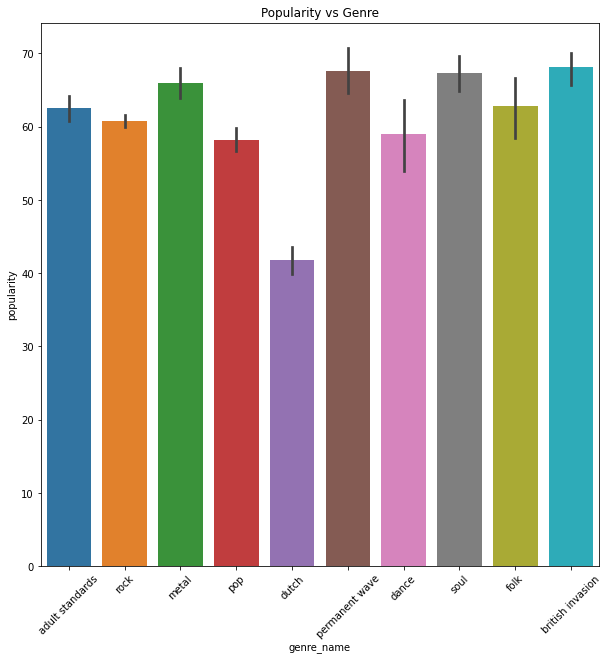

In [475]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_top10_genres,x='genre_name',y='popularity')
plt.xticks(rotation=45)
plt.title('Popularity vs Genre')
plt.show()

In [488]:
# df_char.columns

In [489]:
# df_char.info()

In [490]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         snbarplotarplot(data=df_top10_genres,x='genre_name',y=col, palette='BuGn')
#         plt.title(f'Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.show()

In [491]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, palette='coolwarm')
#         plt.title(f'Bottom 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.show()

In [492]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_top10_genres,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
#         sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
#         plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.legend()
#         plt.show()
        

In [493]:
df_top10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean()

,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
genre_name,,,,,,,,,,
adult standards,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,218.626016,51.382114,3.926829,62.577236
british invasion,119.222222,49.583333,50.027778,-9.805556,21.027778,57.583333,184.583333,39.055556,4.277778,68.083333
dance,130.052632,84.684211,50.473684,-5.473684,21.263158,41.315789,281.000000,3.421053,4.473684,59.000000
dutch,117.378205,54.102564,54.621795,-9.467949,19.910256,48.429487,232.506410,37.051282,5.141026,41.756410
folk,121.523810,37.714286,49.904762,-12.476190,13.952381,33.333333,281.571429,51.333333,3.809524,62.809524
metal,123.182796,74.709677,44.752688,-6.387097,18.827957,39.236559,292.494624,9.655914,5.032258,66.032258
permanent wave,124.763158,55.973684,48.789474,-9.131579,16.368421,28.868421,271.026316,23.710526,3.578947,67.657895
pop,120.036082,58.920103,55.724227,-8.399485,17.585052,47.811856,254.329897,31.752577,4.891753,58.190722
rock,120.551925,62.172695,51.924154,-9.199533,19.081680,51.649942,277.914819,24.096849,4.784131,60.744457


In [495]:
#df_bottom10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean().plot.bar()

In [483]:
# plt.figure(figsize=(15,10))
# sns.barplot(data=df_top10_genres,x=df_char.columns,y=col ,alpha=0.7,color='green', label='Top 10' )
# plt.title(f'Bottom 10 Genres vs {col.upper()}')
# plt.xticks(rotation=45)
# plt.xlabel('Genres')
# plt.ylabel(col.upper())
# plt.legend()
# plt.show()

In [496]:
df_mean = pd.DataFrame()
drop_col = ['song_id','year','artist_id','genre_id']
df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
df_mean['difference'] = df_mean['top_10'] - df_mean['bottom_10']
df_mean

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:4: Future

,top_10,bottom_10,difference
bpm,120.123311,127.555556,-7.432245
energy,59.461712,46.222222,13.239489
danceability,52.408784,59.444444,-7.035661
db,-9.033221,-11.666667,2.633446
liveness,18.633446,26.222222,-7.588776
valence,49.195946,43.666667,5.529279
length,262.722973,257.444444,5.278529
acousticness,28.775901,48.333333,-19.557432
speechiness,4.759572,4.444444,0.315128
popularity,59.393018,49.333333,10.059685


In [501]:
df_diff_info = df_mean[abs(df_mean['difference']) >10]
df_diff_info

,top_10,bottom_10,difference
energy,59.461712,46.222222,13.239489
acousticness,28.775901,48.333333,-19.557432
popularity,59.393018,49.333333,10.059685


In [498]:
cols = list(df_diff_info.columns)
cols.append('genre_name')
cols.append('popularity')

In [500]:
#df_temp = df_top10_genres[cols]


In [ ]:
#TODO: MAKE GRAPH BIGGER

In [503]:
# plt.figure(figsize=(15,10))
# sns.catplot(
#     data=df_temp, x="genre_name", y="acousticness",
#     kind="violin", bw=.15, cut=0,height=20,width=1,aspect=10.5)
# plt.show()

In [505]:
# for col in df_temp.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_temp,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
#         sns.barplot(data=df_temp,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
#         plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.legend()
#         plt.show()
        

In [508]:
df.head(2)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74


In [509]:
df['year'].describe()

count    1994.000000
mean     1992.992979
std        16.116048
min      1956.000000
25%      1979.000000
50%      1993.000000
75%      2007.000000
max      2019.000000
Name: year, dtype: float64

In [510]:
labels = '55-65 65-76 75-83 83-92 92-01 01-10 10-29'.split()

In [511]:
df['decade_group'] = pd.cut(df['year'],bins=7,labels=labels)
df['decade_group'].unique()

['01-10', '10-29', '65-76', '92-01', '55-65', '75-83', '83-92']
Categories (7, object): ['55-65' < '65-76' < '75-83' < '83-92' < '92-01' < '01-10' < '10-29']

<AxesSubplot:xlabel='decade_group', ylabel='popularity'>

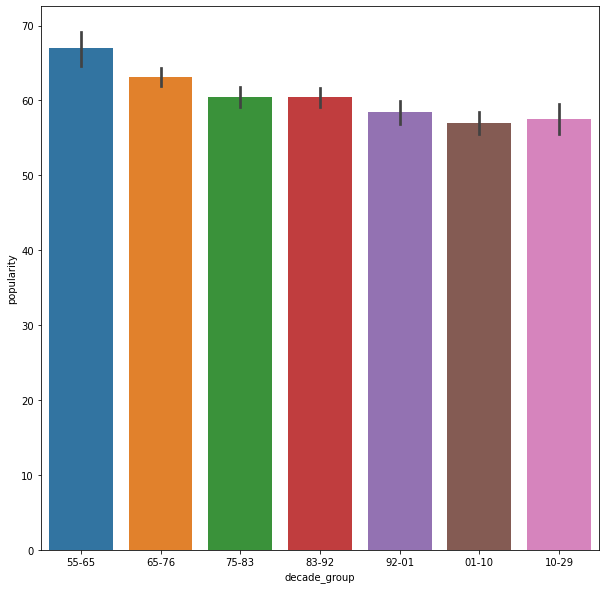

In [512]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='decade_group',y='popularity')

In [513]:
df.groupby(['decade_group']).mean()

,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
decade_group,,,,,,,,,,,,,,
55-65,1873.400000,1962.711111,318.111111,6.888889,122.266667,46.000000,49.533333,-11.066667,17.200000,60.422222,185.844444,57.000000,4.200000,66.955556
65-76,1325.416084,1969.989510,376.244755,3.944056,119.646853,50.587413,48.188811,-10.958042,17.986014,51.695804,261.685315,39.290210,4.765734,63.111888
75-83,1114.000000,1978.712871,388.392739,3.739274,120.844884,61.085809,55.983498,-9.613861,19.719472,59.221122,278.422442,27.759076,5.174917,60.448845
83-92,1433.500000,1987.880952,415.672619,4.851190,119.083333,61.303571,54.589286,-10.175595,18.276786,51.806548,283.824405,23.735119,4.488095,60.482143
92-01,1385.538194,1997.114583,339.739583,5.187500,118.784722,59.864583,52.458333,-8.680556,19.444444,42.600694,262.229167,27.003472,4.913194,58.444444
01-10,216.602703,2005.997297,93.000000,4.921622,122.267568,64.381081,53.545946,-7.332432,19.894595,45.948649,253.956757,25.637838,5.243243,56.989189
10-29,615.500000,2014.816940,213.980874,6.437158,119.978142,60.912568,54.428962,-7.612022,18.893443,44.797814,248.344262,27.573770,5.401639,57.587432


In [514]:
df_group = df.groupby(['decade_group','genre_name'],as_index=False).mean()\
.sort_values(by=['decade_group','popularity'], ascending=[True,False]).dropna()


df_group

,decade_group,genre_name,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
9,55-65,british invasion,1847.111111,1964.333333,113.000000,22.0,127.888889,56.111111,53.000000,-9.888889,9.444444,69.888889,149.555556,42.333333,3.666667,71.222222
0,55-65,adult standards,1896.833333,1960.944444,349.611111,0.0,117.111111,35.666667,46.222222,-12.111111,17.388889,54.666667,181.388889,71.000000,4.666667,68.000000
4,55-65,bebop,1992.000000,1959.000000,729.000000,52.0,174.000000,26.000000,45.000000,-13.000000,7.000000,60.000000,324.000000,54.000000,4.000000,65.000000
18,55-65,country,1836.500000,1963.500000,53.000000,14.0,107.500000,56.000000,67.500000,-9.000000,31.500000,78.000000,157.000000,40.500000,3.000000,64.500000
47,55-65,rock,1859.000000,1964.000000,390.785714,1.0,122.785714,51.571429,49.857143,-10.928571,17.642857,57.785714,204.928571,49.714286,3.857143,64.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,10-29,funk,589.000000,2014.000000,223.000000,29.0,92.000000,88.000000,66.000000,-3.000000,69.000000,77.000000,348.000000,3.000000,9.000000,41.000000
340,10-29,dutch,625.230769,2015.038462,189.769231,5.0,114.653846,55.307692,52.384615,-8.576923,19.576923,49.750000,213.942308,35.557692,5.192308,38.653846
331,10-29,chanson,512.500000,2012.500000,179.500000,18.0,81.000000,45.500000,33.500000,-10.000000,22.500000,55.500000,185.500000,38.000000,4.500000,36.500000
335,10-29,compositional ambient,679.000000,2016.000000,345.000000,40.0,105.000000,24.000000,61.000000,-17.000000,25.000000,37.000000,290.000000,76.000000,3.000000,28.000000


# Top 5 genres per decade

DECADE GROUP 55-65
                  popularity
genre_name                  
british invasion   71.222222
adult standards    68.000000
bebop              65.000000
country            64.500000
rock               64.357143


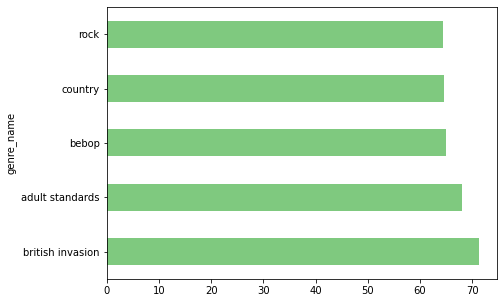

DECADE GROUP 65-76
                  popularity
genre_name                  
soul               70.500000
british invasion   67.636364
folk               65.000000
rock               64.230303
adult standards    63.702128


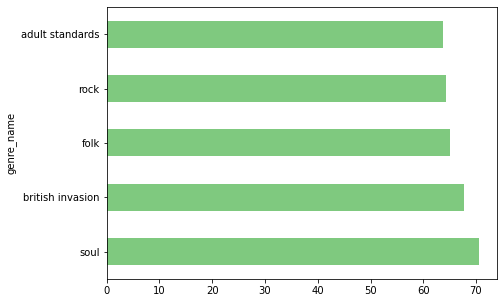

DECADE GROUP 75-83
                 popularity
genre_name                 
mellow gold       76.500000
soul              71.333333
reggae            67.666667
disco             62.166667
adult standards   61.782609


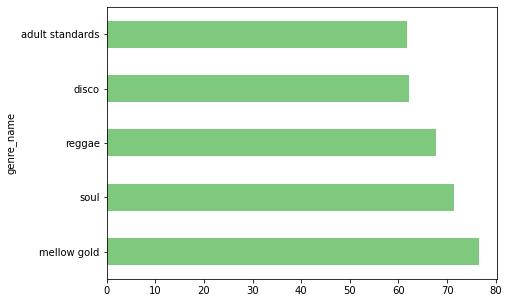

DECADE GROUP 83-92
            popularity
genre_name            
rap          74.000000
punk         72.000000
electro      70.000000
metal        68.451613
hip hop      68.000000


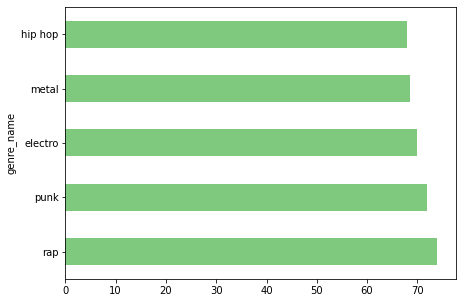

DECADE GROUP 92-01
            popularity
genre_name            
boy band          76.5
reggae            74.0
hip hop           74.0
electro           72.0
celtic            70.0


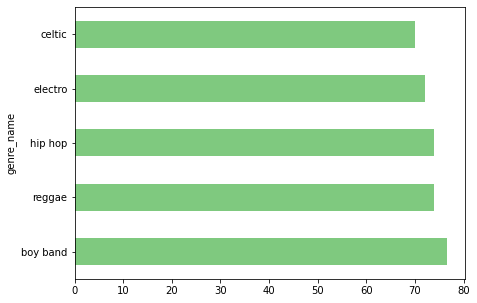

DECADE GROUP 01-10
            popularity
genre_name            
electro      84.000000
hip hop      77.285714
neo mellow   72.545455
funk         72.000000
jazz         69.000000


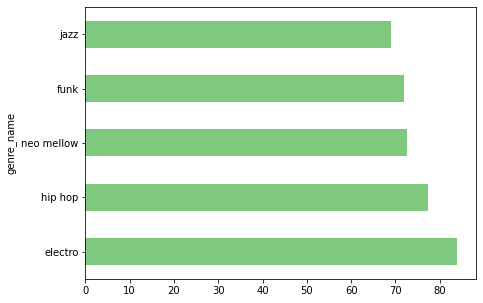

DECADE GROUP 10-29
                  popularity
genre_name                  
australian psych   80.500000
latin              80.000000
house              80.000000
ccm                80.000000
boy band           75.333333


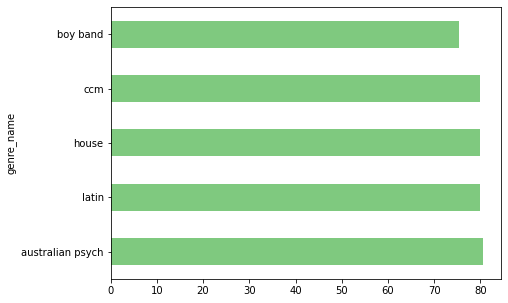

In [515]:
# fig = plt.figure(figsize=(15,12))
test = False
head_num = 5
for i in df_group['decade_group'].unique():
    #fig = plt.figure(figsize=(15,12))
    print(f"DECADE GROUP {i}")

    temp = df[df['decade_group'] == i].groupby('genre_name')[['genre_name','popularity']].mean()
    temp = temp.sort_values(by='popularity',ascending=False)
    #plt.title(f"DECADE GROUP {i}")
    print(temp.head(head_num))
    
    temp.head(head_num).plot.barh(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))

    if test:
        temp.head(head_num).plot.bar(y='popularity', colormap='copper',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.pie(y='popularity', colormap='seismic',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.barh(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.box(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.area(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))


    #plt.tight_layout()    
    plt.show()


In [ ]:
# Top 2 Artist per genres per decade

In [ ]:
df.head(1)

In [516]:
df_artists = df.groupby(['decade_group','artist_name'])['bpm']\
.count().sort_values(ascending=False).reset_index()


df_artists

,decade_group,artist_name,bpm
0,65-76,The Beatles,22
1,75-83,ABBA,20
2,75-83,Queen,16
3,92-01,George Michael,15
4,01-10,Coldplay,15
...,...,...,...
5112,75-83,John Mayer,0
5113,75-83,John Lennon,0
5114,75-83,John Legend,0
5115,75-83,John Hiatt,0


In [517]:
for i in df_artists['decade_group'].unique():
    temp = df_artists[df_artists['decade_group'] == i]
    print(i)
    print(temp['artist_name'].head(3))

65-76
0                     The Beatles
7    Creedence Clearwater Revival
8              The Rolling Stones
Name: artist_name, dtype: object
75-83
1                         ABBA
2                        Queen
25    Bob Marley & The Wailers
Name: artist_name, dtype: object
92-01
3     George Michael
34         Radiohead
46     Marco Borsato
Name: artist_name, dtype: object
01-10
4     Coldplay
27        Muse
28    Doe Maar
Name: artist_name, dtype: object
83-92
5                 Queen
6                    U2
14    Bruce Springsteen
Name: artist_name, dtype: object
10-29
9     Ed Sheeran
10         Adele
11    Kensington
Name: artist_name, dtype: object
55-65
19           The Beatles
40         Elvis Presley
68    The Rolling Stones
Name: artist_name, dtype: object


In [518]:
df['genre_name'].nunique()

53

In [519]:
df['genre_name'].unique()

array(['adult standards', 'rock', 'hip hop', 'metal', 'pop', 'dutch',
       'permanent wave', 'dance', 'soul', 'disco', 'big room',
       'neo mellow', 'boy band', 'carnaval limburg', 'country', 'latin',
       'folk', 'celtic', 'chanson', 'electro', 'downtempo', 'reggae',
       'british invasion', 'jazz', 'trance', 'singer-songwriter',
       'mellow gold', 'blues', 'big beat', 'funk', 'happy hardcore',
       'classic schlager', 'gabba', 'edm', 'electronica', 'indie',
       'stomp and holler', 'australian psych', 'laboratorio',
       'classic soundtrack', 'compositional ambient', 'streektaal', 'ccm',
       'house', 'australian americana', 'j-core', 'punk', 'basshall',
       'christelijk', 'levenslied', 'rap', 'motown', 'bebop'],
      dtype=object)

In [520]:
def genre_colaspe(genre_att):
    genres = 'rock metal pop jazz soul blues punk country folk funk\
    rap house dance dutch indie singer-songwriter latin reggae'.split()
    genres.append('hip hop')
    #print(genres)
    for genre in genres:
        if genre in genre_att:
            return genre
    return genre_att
#     if 'rock' in genre:
#         return 'rock'
#     elif  'hip hop' in genre:
#         return 'hip hop'
#     elif 'metal' in genre:
#         return 'metal'
#     else:
#         return genre
    

In [521]:
# df2 = df.copy()

In [522]:
df2['genre_name'].unique()

array(['adult standards', 'rock', 'hip hop', 'metal', 'pop', 'dutch',
       'permanent wave', 'dance', 'soul', 'disco', 'big room',
       'neo mellow', 'boy band', 'carnaval limburg', 'country', 'latin',
       'folk', 'celtic', 'chanson', 'electro', 'downtempo', 'reggae',
       'british invasion', 'jazz', 'trance', 'singer-songwriter',
       'mellow gold', 'blues', 'big beat', 'funk', 'happy hardcore',
       'classic schlager', 'gabba', 'edm', 'electronica', 'indie',
       'stomp and holler', 'australian psych', 'laboratorio',
       'classic soundtrack', 'compositional ambient', 'streektaal', 'ccm',
       'house', 'australian americana', 'j-core', 'punk', 'basshall',
       'christelijk', 'levenslied', 'rap', 'motown', 'bebop'],
      dtype=object)

In [523]:
df2['genre_name'].nunique()

53

In [524]:
df2['genre_name'] = df2['genre_name'].apply(genre_colaspe)


In [525]:
for i in df2['genre_name'].unique():
    if len(i.split()) > 1:
        print(i)

adult standards
hip hop
permanent wave
big room
neo mellow
boy band
carnaval limburg
british invasion
mellow gold
big beat
happy hardcore
classic schlager
stomp and holler
australian psych
classic soundtrack
compositional ambient
australian americana


In [526]:
df2.to_csv('data_engineer_genre.csv',index=False)

In [527]:
data = pd.read_csv("Spotify-2000.csv")
data.head(1)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71


In [528]:
data['genre'] = data['Top Genre'].apply(genre_colaspe)


In [529]:
data.head(6)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,genre
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,adult standards
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,rock
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,hip hop
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,metal
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,rock
5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45,rock


In [530]:
df_genres = pd.DataFrame(list(data['genre'].unique()),columns=['genre']).reset_index()
df_genres=df_genres.rename(columns={"index":"genre_id"})
df_genres.tail()

,genre_id,genre
48,48,christelijk
49,49,levenslied
50,50,rap
51,51,motown
52,52,bebop


In [531]:
df_songs=df_songs.merge(df_artist).merge(df_genres)
df_songs.drop(['artist_name','genre_name'],axis=1,inplace=True)
df_songs

NameError: name 'df_artist' is not defined